
## **Topic: Stock Market Trading using Machine Learning and Deep Learning**


## **Implementation:**

### Importing the required Libraries

In [ ]:
import pandas as pd #For data related tasks
import numpy as np 
import matplotlib.pyplot as plt #For data visualization 
from sklearn.tree import DecisionTreeRegressor # Decision Tree classifier
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.metrics import mean_absolute_error #Mean Absolute Error
from sklearn.metrics import mean_squared_error #Mean Squared Error
import math
from sklearn.preprocessing import MinMaxScaler #Min Max Scaler Normalization
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM


### Importing the CSV named 'Amazon'

We chose a dataset from Amazon dated 04-01-2010 to 31-12-2020. \\
This dataset attribute is open, high, low, close and volume but we selected close as a label data and the rest of to extract the features that
will help to predict the result. 

Source: https://finance.yahoo.com/quote/AMZN/history?p=AMZN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.csv to Amazon.csv


### Converting the values into a dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Amazon.csv']))

In [ ]:
df.head()

,Date,Open,High,Low,Volume,Close
0,04-01-2010,136.250000,136.610001,133.139999,7599900,133.899994
1,05-01-2010,133.429993,135.479996,131.809998,8851900,134.690002
2,06-01-2010,134.600006,134.729996,131.649994,7178800,132.250000
3,07-01-2010,132.009995,132.320007,128.800003,11030200,130.000000
4,08-01-2010,130.559998,133.679993,129.029999,9830500,133.520004


In [ ]:
df.tail()

,Date,Open,High,Low,Volume,Close
2764,24-12-2020,3193.899902,3202.000000,3169.000000,1451900,3172.689941
2765,28-12-2020,3194.000000,3304.000000,3172.689941,5686800,3283.959961
2766,29-12-2020,3309.939941,3350.649902,3281.219971,4872900,3322.000000
2767,30-12-2020,3341.000000,3342.100098,3282.469971,3209300,3285.850098
2768,31-12-2020,3275.000000,3282.919922,3241.199951,2957200,3256.929932


In [ ]:
df.shape

(2769, 6)

## **Data Pre-Processing**

#### 1. We will check for null values in the entire dataset
#### 2. Round all the values upto 2 decimal places

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [ ]:
df.round({'Open': 2, 'High': 2, 'Low': 2, 'Volume': 2, 'Close': 2})

,Date,Open,High,Low,Volume,Close
0,04-01-2010,136.25,136.61,133.14,7599900,133.90
1,05-01-2010,133.43,135.48,131.81,8851900,134.69
2,06-01-2010,134.60,134.73,131.65,7178800,132.25
3,07-01-2010,132.01,132.32,128.80,11030200,130.00
4,08-01-2010,130.56,133.68,129.03,9830500,133.52
...,...,...,...,...,...,...
2764,24-12-2020,3193.90,3202.00,3169.00,1451900,3172.69
2765,28-12-2020,3194.00,3304.00,3172.69,5686800,3283.96
2766,29-12-2020,3309.94,3350.65,3281.22,4872900,3322.00
2767,30-12-2020,3341.00,3342.10,3282.47,3209300,3285.85


###Converting the dataframe into array.values for easy access to features and target variable and also for training the model.

In [ ]:
array = df.values

## **Features X:** Attributes: {'Open', 'High', 'Low', 'Volume'}
## **Target Y:** Attribute:  {'Close'}	

In [ ]:
X = array[:,1:5]
Y = array[:,5]

In [ ]:
print('Features X: \n\n{} '.format(X))

Features X: 

[[136.25 136.610001 133.139999 7599900]
 [133.429993 135.479996 131.809998 8851900]
 [134.600006 134.729996 131.649994 7178800]
 ...
 [3309.939941 3350.649902 3281.219971 4872900]
 [3341.0 3342.100098 3282.469971 3209300]
 [3275.0 3282.919922 3241.199951 2957200]] 


In [ ]:
print('Target Variable Y: \n\n{} '.format(Y))

Target Variable Y: 

[133.899994 134.690002 132.25 ... 3322.0 3285.850098 3256.929932] 


## **Train-Test Split into 80-20 ratio**

The percentage of trains and tests would impact the
accuracy of predicting the result. \\
At this stage what ratio you want to choose
for the train and test dataset it’s up to you but if
you take more train dataset compare to test then
accuracy would be better. The general ratio for train
and test dataset is 80% and 20% respectively

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

To compare, we'll use three algorithms. The algorithms are picked based on the findings of our survey paper.

Result from Survey Paper:

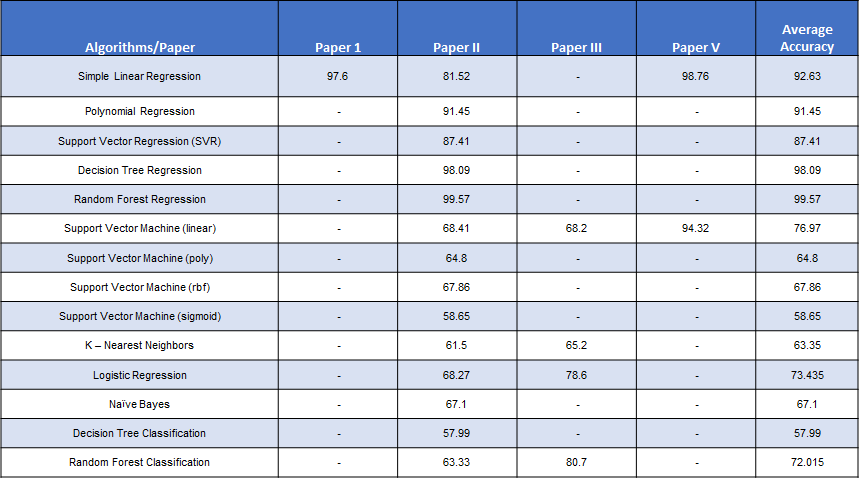

On the basis of highest accuracy, the three algorithms are:

**1. Simple Linear Regression** \\
**2. Decision Tree Regression** \\
**3. Random Forest Regression** \\





In [ ]:
LR = LinearRegression()
Classifier = DecisionTreeRegressor()
clf=RandomForestRegressor()

### We will fit all these three algorithms with X_train and y_train.

In [ ]:
LR.fit(X_train,y_train)
Classifier.fit(X_train,y_train)
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prediction of X_test i.e. Testing data using all three algorithms

In [ ]:
y_pred_LR = LR.predict(X_test)
y_pred_DT = Classifier.predict(X_test)
y_pred_RFR = clf.predict(X_test)

Since these are regression algorithms, we'll utilise the following metrics:



*   Mean Absolute Error
*   Mean Squared Error
*   Root Mean Squared Error






In [ ]:
mae_lr =  mean_absolute_error(y_test,y_pred_LR)
mae_dt =  mean_absolute_error(y_test,y_pred_DT)
mae_rfr = mean_absolute_error(y_test,y_pred_RFR)

mse_lr =  mean_squared_error(y_test,y_pred_LR)
mse_dt =  mean_squared_error(y_test,y_pred_DT)
mse_rfr = mean_squared_error(y_test,y_pred_RFR)

rmse_lr = np.sqrt(mse_lr)
rmse_dt = np.sqrt(mse_dt)
rmse_rfr = np.sqrt(mse_rfr)

print('\033[1m' + "Simple Linear Regression \t       Decision Tree Regression \t       Random Forest Regression")
print("MAE: {0:.4f} \t\t               MAE: {1:.4f} \t                       MAE: {2:.4f}".format(mae_lr,mae_dt,mae_rfr))
print("MSE: {0:.4f} \t\t               MSE: {1:.4f} \t                       MSE: {2:.4f}".format(mse_lr,mse_dt,mse_rfr))
print("RMSE: {0:.4f} \t\t               RMSE: {1:.4f} \t                       RMSE: {2:.4f}".format(rmse_lr,rmse_dt,rmse_rfr))


Simple Linear Regression 	       Decision Tree Regression 	       Random Forest Regression
MAE: 5.0599 		               MAE: 8.8233 	                       MAE: 6.9075
MSE: 104.9888 		               MSE: 327.9825 	                       MSE: 188.3498
RMSE: 10.2464 		               RMSE: 18.1103 	                       RMSE: 13.7241


According to the above MAE and RMSE Score, the Simple Linear Regression Algorithm is the most accurate with least Mean Absolute Error and Root Mean Squared Error.

# **Long Short-Term Memory**

### Plotting Close Price History using matplotlib

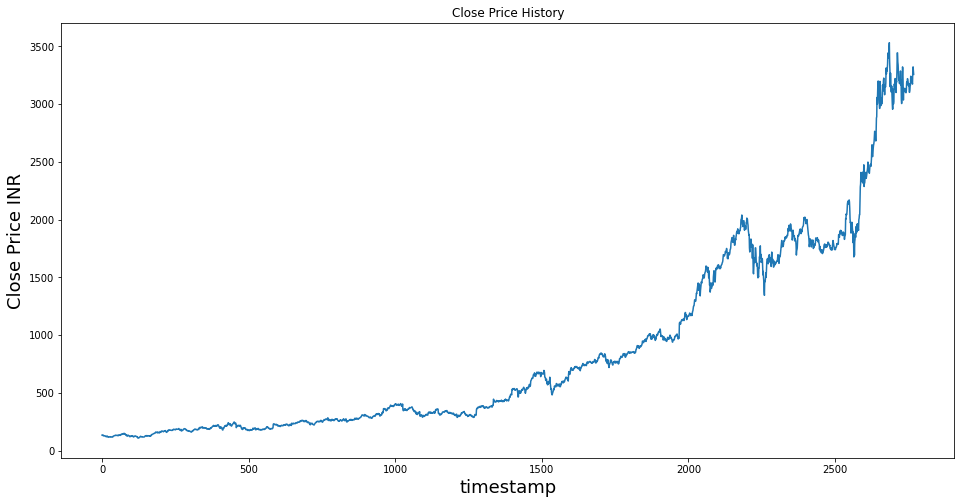

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

### Converting data to a numpy array 

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
dataset

array([[ 133.899994],
       [ 134.690002],
       [ 132.25    ],
       ...,
       [3322.      ],
       [3285.850098],
       [3256.929932]])

### Transforming the dataset array to range between 0 and 1

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

### Spliting data for training and testing

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### **Building a LSTM Model for Stock Market Prediction**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

### **Using adam optimizer and mean_squared_error as the loss function**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

### **Epochs = 5 as per trial and error method and batch size = 64**

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
34/34 [==============================] - 7s 81ms/step - loss: 0.0023
Epoch 2/5
34/34 [==============================] - 3s 84ms/step - loss: 1.4746e-04
Epoch 3/5
34/34 [==============================] - 3s 83ms/step - loss: 7.1117e-05
Epoch 4/5
34/34 [==============================] - 3s 84ms/step - loss: 6.3308e-05
Epoch 5/5
34/34 [==============================] - 3s 85ms/step - loss: 6.5671e-05


### Creating the x_test and y_test datasets

In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

### Prediction on test dataset

In [ ]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

### **Finding the root mean squared error, mean absolue error and mean squared error**

In [ ]:
mae_lstm =  mean_absolute_error(y_test,predictions)

mse_lstm =  mean_squared_error(y_test,predictions)

rmse_lstm = np.sqrt(mse_lstm)

print('\033[1m' + "Long Short-Term Memory")
print("MAE: {0:.4f}".format(mae_lstm))
print("MSE: {0:.4f}".format(mse_lstm))
print("RMSE: {0:.4f}".format(rmse_lstm))



Long Short-Term Memory
MAE: 94.8269
MSE: 16582.2000
RMSE: 128.7719


### **Plotting the predicted values**

Blue color - Plot of Training Data

Orange color - Plot of Validation Data

Green color - Prediction of Validation Data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


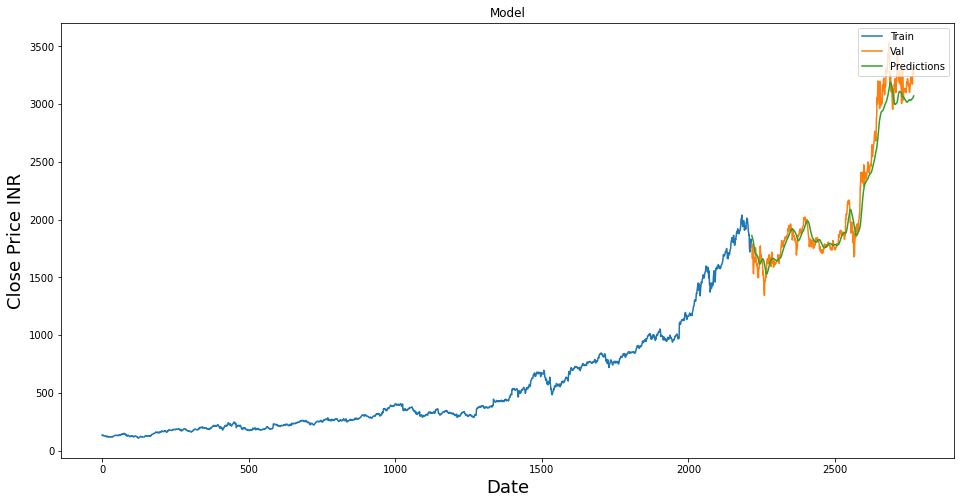

In [ ]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(display['Close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# **Final Result**

In [ ]:
print('\033[1m' + "Simple Linear Regression \t       Decision Tree Regression \t       Random Forest Regression \t            Long Short-Term Memory")
print("MAE: {0:.4f} \t\t               MAE: {1:.4f} \t                       MAE: {2:.4f}\t                            MAE: {3:.4f}".format(mae_lr,mae_dt,mae_rfr,mae_lstm))
print("MSE: {0:.4f} \t\t               MSE: {1:.4f} \t                       MSE: {2:.4f}\t                            MSE: {3:.4f}".format(mse_lr,mse_dt,mse_rfr,mse_lstm))
print("RMSE: {0:.4f} \t\t               RMSE: {1:.4f} \t                       RMSE: {2:.4f}\t                            RMSE: {3:.4f}".format(rmse_lr,rmse_dt,rmse_rfr,rmse_lstm))


Simple Linear Regression 	       Decision Tree Regression 	       Random Forest Regression 	            Long Short-Term Memory
MAE: 5.0599 		               MAE: 8.8233 	                       MAE: 6.9075	                            MAE: 94.8269
MSE: 104.9888 		               MSE: 327.9825 	                       MSE: 188.3498	                            MSE: 16582.2000
RMSE: 10.2464 		               RMSE: 18.1103 	                       RMSE: 13.7241	                            RMSE: 128.7719


# **Conclusion**

We implemented the Simple Linear Regression algorithm, Decision Tree Regression algorithm, Random Forest Regression algorithm and Long Short-Term Memory algorithm on the Stock market data from 4 January 2010 to 31 December 2020 to predict its stock price.

As the results show, the lowest RMSE was found for Simple Linear Regression algorithm. This was the best from all the four algorithms. The next was Random Forest followed by Decision tree algorithm to predict the nearest close value of the stock price. The most RMSE was found for LSTM.

Ranking all the four algorithms from best to least to predict the close value of stock price are:

**I - Simple Linear Regression**

**II - Random Forest Regression**

**III - Decision Tree Regression**

**IV - Long Short-Term Memory**